# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
!pip install palmerpenguins

In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, recall_score, precision_score, auc, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from plotnine import *
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [3]:
# Code Here
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()
penguins = penguins.dropna(axis =0)

In [51]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("logistic_regression", LogisticRegression(penalty = 'elasticnet', solver='saga'))]
)

In [46]:
penguins["Gentoo"] = (penguins['species'] == "Gentoo").astype(int)

In [47]:
penguins["Gentoo"].value_counts()

0    214
1    119
Name: Gentoo, dtype: int64

In [48]:
X = penguins.drop(["Gentoo", "species"], axis =1)
y = penguins["Gentoo"]

In [ ]:
tune = {'logistic_regression__C': [0.001,.01,.1,1,10,25,50,75, 100, 125, 150, 175, 200, 500, 1000],
           'logistic_regression__l1_ratio': [0,.01,.2,.3,.4,.5, .75, .85, .95,1]}
gscv1 = GridSearchCV(lr_pipeline, tune, cv = 5, scoring='accuracy')
gscv_fitted1 = gscv1.fit(X, y)

In [57]:
results_df = pd.DataFrame(gscv_fitted1.cv_results_)
results_df = results_df[["param_logistic_regression__C", "param_logistic_regression__l1_ratio", "mean_test_score"]]
results_df.sort_values(by=["mean_test_score"], ascending = False)

,param_logistic_regression__C,param_logistic_regression__l1_ratio,mean_test_score
75,75,0.5,1.00000
95,125,0.5,1.00000
97,125,0.85,1.00000
98,125,0.95,1.00000
99,125,1,1.00000
...,...,...,...
5,0.001,0.5,0.64265
4,0.001,0.4,0.64265
3,0.001,0.3,0.64265
2,0.001,0.2,0.64265


In [ ]:
cv1 = cross_val_score(lr_pipeline, X, y, cv = 5, scoring = 'accuracy')
cva = cv1.mean()
cva

In [69]:
X = penguins.drop(["species"], axis =1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [67]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("decisionTree", DecisionTreeClassifier())]
)

In [73]:
lr_pipeline_fitted = lr_pipeline.fit(X, y)
y_pred_train = lr_pipeline_fitted.predict(X_train)
confusion_matrix(y_train, y_pred_train)

In [74]:
confusion_matrix(y_train, y_pred_train)

array([[105,   0,   0],
       [  0,  56,   0],
       [  0,   0,  88]])

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [4]:
# Code Here
X = penguins.drop(["species"], axis =1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

KNN Model 1

In [7]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsClassifier())]
)

In [8]:
k = {'KNN__n_neighbors': [2,5,10,15,20,25]}
gscv1 = GridSearchCV(knn_pipeline,k, cv = 5, scoring='accuracy')
gscv_fitted1 = gscv1.fit(X, y)

results_df = pd.DataFrame(gscv_fitted1.cv_results_)
results_df = results_df[["param_KNN__n_neighbors",  "mean_test_score"]]
results_df.sort_values(by=["mean_test_score"], ascending = False)


,param_KNN__n_neighbors,mean_test_score
1,5,0.993985
4,20,0.993985
2,10,0.991000
3,15,0.991000
5,25,0.988014
0,2,0.979014


In [107]:
knn_pipeline1 = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsClassifier(n_neighbors = 5))]
)

In [108]:
knn_pipeline_fitted1 = knn_pipeline1.fit(X, y)
y_pred = knn_pipeline_fitted1.predict(X_test)
knn1_cm = confusion_matrix(y_test, y_pred)
knn1_cm

array([[33,  1,  0],
       [ 0, 18,  0],
       [ 0,  0, 32]])

In [109]:
knn1_accuracy = accuracy_score(y_test, y_pred)
knn1_accuracy

0.9880952380952381

In [110]:
knn1_precision = precision_score(y_test,y_pred, average=None)
knn1_precision

array([1.        , 0.94736842, 1.        ])

In [113]:
knn1_recall = recall_score(y_test, y_pred, average =None)
knn1_recall

array([0.97058824, 1.        , 1.        ])

In [111]:
y_pred_prob = knn_pipeline1.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate AUC for each class
n_classes = y_test_bin.shape[1]
auc_per_class = []

for i in range(n_classes):
    auc_class_i = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_per_class.append(auc_class_i)

# Display AUC for each class
for i in range(n_classes):
    print(f"AUC for Class {i}: {auc_per_class[i]:.2f}")

AUC for Class 0: 1.00
AUC for Class 1: 1.00
AUC for Class 2: 1.00


In [112]:
knn1_f1 = f1_score(y_test, y_pred, average = "weighted")
knn1_f1

0.9881672717493613

KNN Model 2

In [114]:
knn_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("KNN", KNeighborsClassifier(n_neighbors = 12))]
)

In [115]:
knn_pipeline_fitted2 = knn_pipeline2.fit(X, y)
y_pred = knn_pipeline_fitted2.predict(X_test)
knn2_cm = confusion_matrix(y_test, y_pred)
knn2_cm

array([[33,  1,  0],
       [ 0, 18,  0],
       [ 0,  0, 32]])

In [116]:
knn2_accuracy = accuracy_score(y_test, y_pred)
knn2_accuracy

0.9880952380952381

In [117]:
y_pred_prob = knn_pipeline2.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate AUC for each class
n_classes = y_test_bin.shape[1]
auc_per_class = []

for i in range(n_classes):
    auc_class_i = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_per_class.append(auc_class_i)

# Display AUC for each class
for i in range(n_classes):
    print(f"AUC for Class {i}: {auc_per_class[i]:.2f}")

AUC for Class 0: 1.00
AUC for Class 1: 1.00
AUC for Class 2: 1.00


In [119]:
knn2_precision = precision_score(y_test,y_pred, average=None)
knn2_precision

array([1.        , 0.94736842, 1.        ])

In [120]:
knn2_recall = recall_score(y_test, y_pred, average = None)
knn2_recall

array([0.97058824, 1.        , 1.        ])

In [121]:
knn2_f1 = f1_score(y_test, y_pred, average = None)
knn2_f1

array([0.98507463, 0.97297297, 1.        ])

Decision Tree Model 1

In [23]:
dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeClassifier())]
)

In [67]:
alpha = {'DecisionTree__min_impurity_decrease': [0,0.1,0.5, 0.75, 2,5,10,15,20,25,50,100,200,500]}
gscv1 = GridSearchCV(dt_pipeline,alpha, cv = 5, scoring='accuracy')
gscv_fitted1 = gscv1.fit(X, y)

results_df = pd.DataFrame(gscv_fitted1.cv_results_)
results_df = results_df[["param_DecisionTree__min_impurity_decrease",  "mean_test_score"]]
results_df.sort_values(by=["mean_test_score"], ascending = False)


,param_DecisionTree__min_impurity_decrease,mean_test_score
0,0,0.972863
1,0.1,0.936816
2,0.5,0.438444
3,0.75,0.438444
4,2,0.438444
5,5,0.438444
6,10,0.438444
7,15,0.438444
8,20,0.438444
9,25,0.438444


In [122]:
dt_pipeline1 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeClassifier(min_impurity_decrease = 0))]
)

In [123]:
dt_pipeline_fitted1 = dt_pipeline1.fit(X, y)
y_pred = dt_pipeline_fitted1.predict(X_test)
dt1_cm = confusion_matrix(y_test, y_pred)
dt1_cm

array([[34,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 32]])

In [124]:
dt1_accuracy = accuracy_score(y_test, y_pred)
dt1_accuracy

1.0

In [125]:
y_pred_prob = dt_pipeline1.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate AUC for each class
n_classes = y_test_bin.shape[1]
auc_per_class = []

for i in range(n_classes):
    auc_class_i = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_per_class.append(auc_class_i)

# Display AUC for each class
for i in range(n_classes):
    print(f"AUC for Class {i}: {auc_per_class[i]:.2f}")

AUC for Class 0: 1.00
AUC for Class 1: 1.00
AUC for Class 2: 1.00


In [127]:
dt1_precision = precision_score(y_test,y_pred, average=None)
dt1_precision

array([1., 1., 1.])

In [126]:
dt1_recall = recall_score(y_test, y_pred, average = None)
dt1_recall

array([1., 1., 1.])

In [128]:
dt1_f1 = f1_score(y_test, y_pred, average = None)
dt1_f1

array([1., 1., 1.])

Decision Tree Model 2

In [129]:
dt_pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeClassifier(min_impurity_decrease = 0.1))]
)

In [130]:
dt_pipeline_fitted2 = dt_pipeline2.fit(X, y)
y_pred = dt_pipeline_fitted2.predict(X_test)
dt2_cm = confusion_matrix(y_test, y_pred)
dt2_cm

array([[33,  1,  0],
       [ 0, 18,  0],
       [ 0,  1, 31]])

In [131]:
dt2_accuracy = accuracy_score(y_test, y_pred)
dt2_accuracy

0.9761904761904762

In [102]:
from sklearn.preprocessing import label_binarize

In [133]:
y_pred_prob = dt_pipeline2.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate AUC for each class
n_classes = y_test_bin.shape[1]
auc_per_class = []

for i in range(n_classes):
    auc_class_i = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_per_class.append(auc_class_i)

# Display AUC for each class
for i in range(n_classes):
    print(f"AUC for Class {i}: {auc_per_class[i]:.2f}")

AUC for Class 0: 0.99
AUC for Class 1: 0.98
AUC for Class 2: 0.99


In [134]:
dt2_precision = precision_score(y_test,y_pred, average=None)
dt2_precision

array([1. , 0.9, 1. ])

In [135]:
dt2_recall = recall_score(y_test,y_pred, average=None)
dt2_recall

array([0.97058824, 1.        , 0.96875   ])

In [136]:
dt2_f1 = f1_score(y_test, y_pred, average = None)
dt2_f1

array([0.98507463, 0.94736842, 0.98412698])

Create one ROC plot for the species of your choice

In [138]:
from sklearn.metrics import roc_curve, auc
from plotnine import *

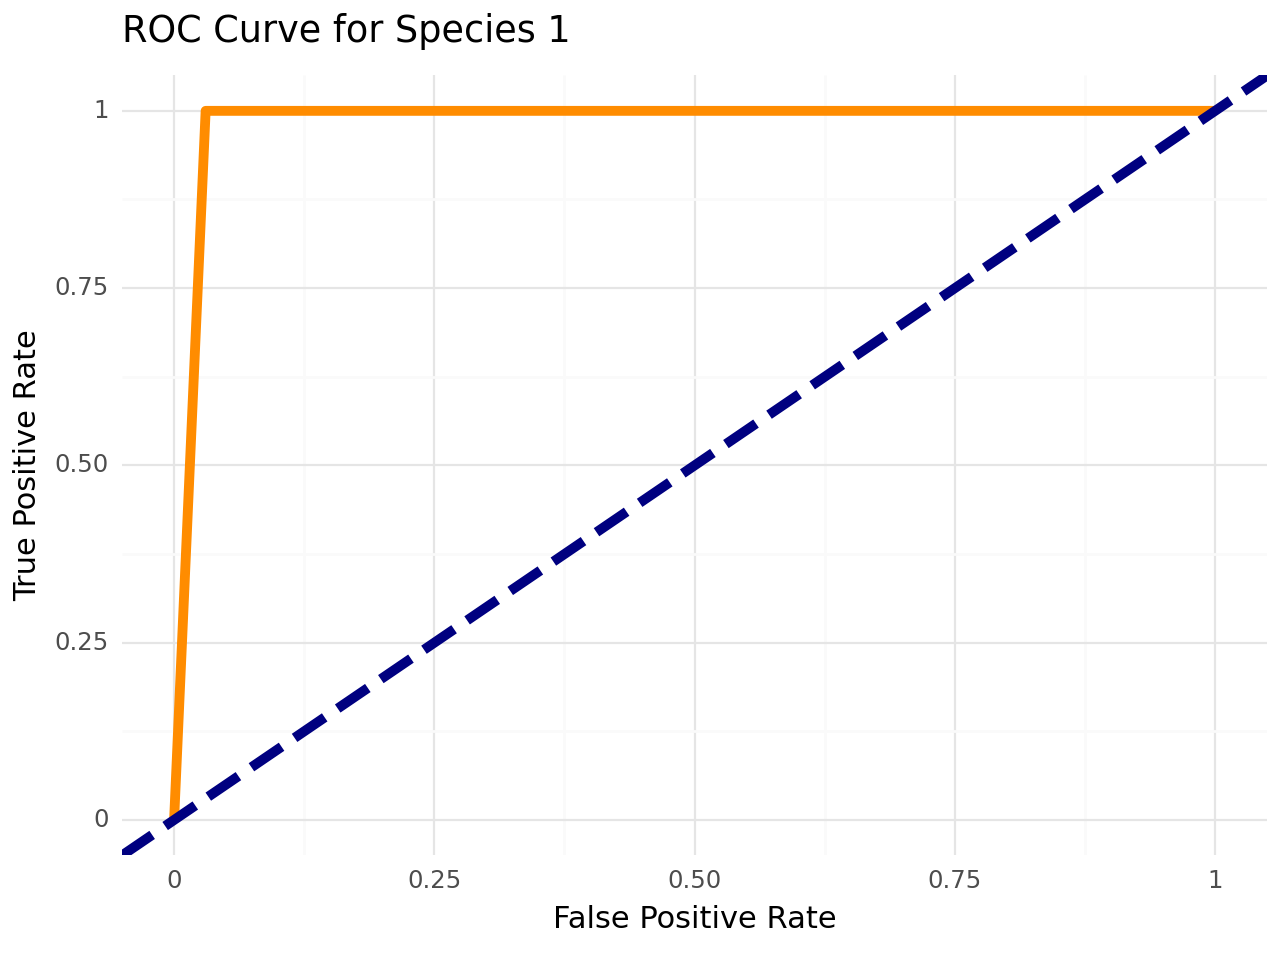

<Figure Size: (640 x 480)>

In [139]:
species_class_index = 1
fpr, tpr, _ = roc_curve(y_test_bin[:, species_class_index], y_pred_prob[:, species_class_index])
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

# Plot the ROC curve using plotnine
(
    ggplot(roc_df, aes(x='False Positive Rate', y='True Positive Rate')) +
    geom_line(color='darkorange', size=2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='navy', size=2) +
    labs(title=f'ROC Curve for Species {species_class_index}', x='False Positive Rate', y='True Positive Rate') +
    theme_minimal()
)